# IMPORTING FILES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('/Users/himanshigupta/Desktop/news.csv')

In [4]:
df = pd.read_csv('/Users/himanshigupta/Desktop/news.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
df.shape

(6335, 4)

In [8]:
df=df.sample(frac=1)
df.head(10)

,Unnamed: 0,title,text,label
5534,8333,Technology Blackout Feared As Solar Storm Hits...,Edmondo Burr in Sci/Environment // 0 Comment...,FAKE
2069,8230,Official Online National Donald Trump Polls Up...,Report Copyright Violation OFFICIAL ONLINE NAT...,FAKE
5389,2886,How Obama Abandoned Democracy in Iraq,W hen trying to explain the current unrest in ...,REAL
5194,4513,France launches fierce assault on ISIS targets...,French warplanes launched a ferocious retaliat...,REAL
4968,7487,Ben Shapiro Destroys John Oliver On Abortion A...,Ben Shapiro Destroys John Oliver On Abortion A...,FAKE
472,5183,Why the DNC's mysteriously hacked oppo file on...,First we were told that a Russian hacker had b...,REAL
1522,7268,Former US Attorney for DC: New Hillary Email P...,Former United States Attorney for the District...,FAKE
78,7744,Lavrov and Kerry discuss Syrian settlement,Lavrov and Kerry discuss Syrian settlement Oct...,FAKE
2667,881,Voters have given up on trust: Kirsten Powers,"As faith in American institutions falls, voter...",REAL
5626,6846,Prowling Amur tiger nabbed near Vladivostok,Prowling Amur tiger nabbed near Vladivostok Oc...,FAKE


In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
# Removing the special characters

def word_drop(text):
  text=text.lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub('\\W'," ",text)
  text=re.sub('https?://\S+\|www\.\S+', '', text)
  text=re.sub('<.*?>+', '', text)
  text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text=re.sub('\n', '', text)
  text=re.sub('\w*\d\w*', '', text)
  return text

In [11]:
df["text"]=df["text"].apply(word_drop)

In [12]:
# Removing the title (we will only use the text)

df.drop(["title"],axis=1,inplace=True)

In [13]:
df.head(10)

,Unnamed: 0,text,label
5534,8333,edmondo burr in sci environment comments...,FAKE
2069,8230,report copyright violation official online nat...,FAKE
5389,2886,w hen trying to explain the current unrest in ...,REAL
5194,4513,french warplanes launched a ferocious retaliat...,REAL
4968,7487,ben shapiro destroys john oliver on abortion a...,FAKE
472,5183,first we were told that a russian hacker had b...,REAL
1522,7268,former united states attorney for the district...,FAKE
78,7744,lavrov and kerry discuss syrian settlement oct...,FAKE
2667,881,as faith in american institutions falls voter...,REAL
5626,6846,prowling amur tiger nabbed near vladivostok oc...,FAKE


In [14]:
# Convert to lowercase

df['text'] = df['text'].apply(lambda x: x.lower())


In [15]:
df.head()

,Unnamed: 0,text,label
5534,8333,edmondo burr in sci environment comments...,FAKE
2069,8230,report copyright violation official online nat...,FAKE
5389,2886,w hen trying to explain the current unrest in ...,REAL
5194,4513,french warplanes launched a ferocious retaliat...,REAL
4968,7487,ben shapiro destroys john oliver on abortion a...,FAKE


In [16]:
# Removing stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himanshigupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df.head()

,Unnamed: 0,text,label
5534,8333,edmondo burr sci environment comments yesterda...,FAKE
2069,8230,report copyright violation official online nat...,FAKE
5389,2886,w hen trying explain current unrest middle eas...,REAL
5194,4513,french warplanes launched ferocious retaliator...,REAL
4968,7487,ben shapiro destroys john oliver abortion trum...,FAKE


## EXPLORATORY DATA ANALYSIS

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


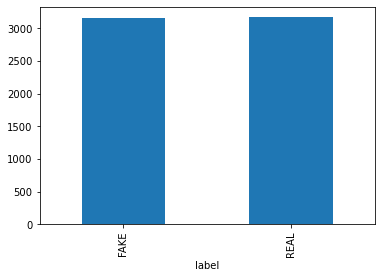

In [18]:
# How many fake and real articles?

print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

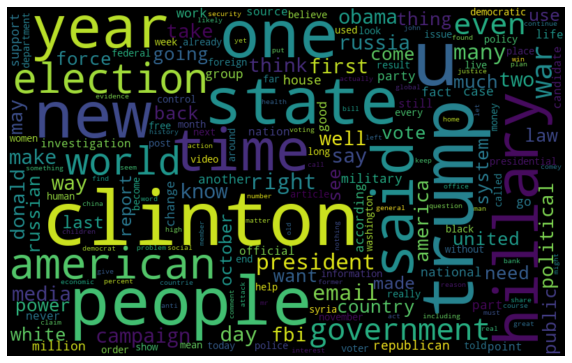

In [19]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df[df["label"] == "FAKE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

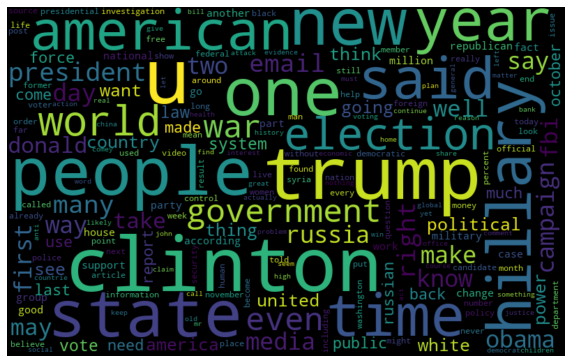

In [20]:
# Word cloud for real news

from wordcloud import WordCloud

real_data = df[df["label"] == "TRUE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# MODELLING

In [21]:
x=df['text']
y=df['label']

In [22]:
# Split the data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)

In [23]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [24]:
# Function to plot the confusion matrix 

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Naive Bayes

In [25]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

# does data extraction and preprocessing to model training and deployment
NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

# Fitting the model
model = pipe.fit(x_train, y_train)


# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 85.23%


Confusion matrix, without normalization


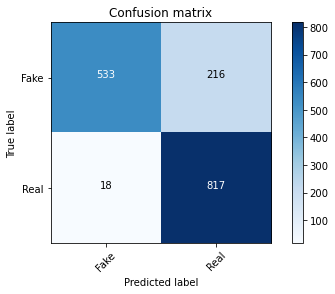

In [26]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression


# does data extraction and preprocessing to model training and deployment
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])


# Fitting the model
model = pipe.fit(x_train, y_train)


# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 90.97%


Confusion matrix, without normalization


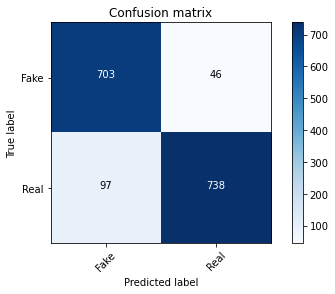

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF(counts frequency of term)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 79.55%


Confusion matrix, without normalization


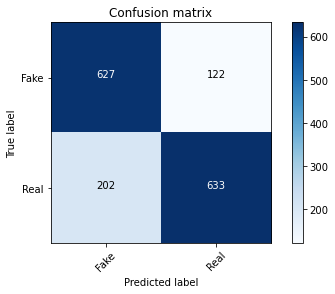

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

print(RFC.score(xv_test, y_test)*100)
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

89.83585858585859


Confusion matrix, without normalization


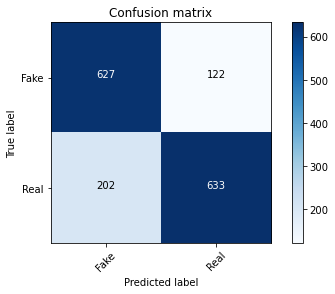

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Support Vector Machine (SVM)

In [34]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel


# does data extraction and preprocessing to model training and deployment
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.81%


Confusion matrix, without normalization


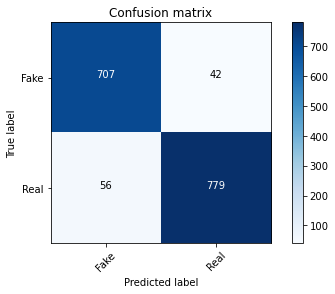

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comaprison

([<matplotlib.axis.YTick at 0x7ff0deca66a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

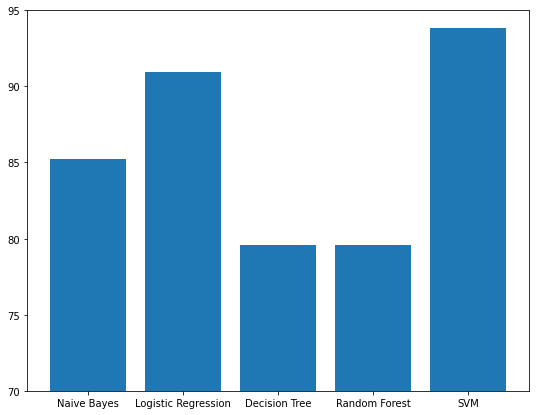

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(80,95)
plt.yticks((70, 75, 80, 85, 90, 95))